# Regresión lineal para encontrar efectos de inhibición

Si se cuenta con datos experimentales de varios procesos fermentativos en los que se hayan variado las concentraciones iniciales, entonces el efecto de inhibición puede ser evaluado con gráficas Lineweaver-Burk. Para ello es necesario modificar la ecuación de Monod para que quede de la manera que se muestra en la ecuación:

$$ \frac{x}{\mu}=\frac{K_{si}}{\mu_{mi}}\left(\frac{1}{s}\right)+\frac{1}{\mu_{mi}} $$

Esta modificación permitirá linealizar el modelo de crecimiento y cuando se grafiquen los modelos partiendo de datos experimentales con diferentes concentraciones, se generarán arreglos diferentes. Dependiendo el arreglo que presente podrá definirse qué tipo de inhibición existe en el proceso fermentativo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyomo.environ import *
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data = data.drop('Unnamed: 0', axis=1)
data

,t,S,X,P
0,0,187.8800,0.447337,1.4375
1,2,188.1025,0.821843,1.2825
2,4,185.5150,0.999299,1.9150
3,6,187.5525,1.271768,4.0775
4,8,175.6700,1.700620,8.8525
5,10,160.9575,2.513960,16.0000
6,12,149.8950,2.935418,24.4775
7,15,116.9600,3.127662,40.1375
8,18,86.3550,3.135056,47.6800
9,21,63.4575,4.547310,60.0050


In [4]:
data['Td'] = (data['t'])/(3.32*np.log10(data['X']/data.loc[0, 'X']))
data['growth'] = np.log(2)/data['Td']
data

,t,S,X,P,Td,growth
0,0,187.8800,0.447337,1.4375,NaN,NaN
1,2,188.1025,0.821843,1.2825,2.280524,0.303942
2,4,185.5150,0.999299,1.9150,3.451604,0.200819
3,6,187.5525,1.271768,4.0775,3.982671,0.174041
4,8,175.6700,1.700620,8.8525,4.154747,0.166833
5,10,160.9575,2.513960,16.0000,4.017545,0.172530
6,12,149.8950,2.935418,24.4775,4.423871,0.156683
7,15,116.9600,3.127662,40.1375,5.349458,0.129573
8,18,86.3550,3.135056,47.6800,6.411565,0.108109
9,21,63.4575,4.547310,60.0050,6.280585,0.110363


A fin de verificar si existe un efecto de inhibición por sustrato y por producto, se realizó un análisis gráfico empleando el método de Lineweaver-Burk, que consistió en linealizar el modelo, utilizando la ecuación de inhibición (Han y Levenspiel, 1988) y analizar el gráfico resultante. La modificación de los datos se llevó a cabo implementando bucles, operaciones simples y creando listas en Python. La linealización del modelo se realizó empleando el método de regresión lineal de la librería Sklearn, que permite aplicar el método con el comando LinearRegression().fit(xdata, ydata).  

In [5]:
X = data.loc[1:,'X'].tolist()
S = data.loc[1:,'S'].tolist()
u = data.loc[1:,'growth'].tolist()

In [6]:
xu = []
for i in range(len(X)):
    xou = X[i] / u[i]
    xu.append(xou)
    
xu = np.asarray(xu)
xu

array([ 2.70394604,  4.97612199,  7.307299  , 10.19357099, 14.57114467,
       18.73470776, 24.13816033, 28.99905899, 41.20303461, 47.56778232,
       55.39430305, 66.71081776, 74.01540863])

In [7]:
invS = []
for i in range(len(S)):
    inv = 1 / S[i]
    invS.append(inv)
    
invS = np.asarray(invS)
invS

array([0.00531625, 0.0053904 , 0.00533184, 0.00569249, 0.00621282,
       0.00667134, 0.00854993, 0.01158011, 0.01575858, 0.02306539,
       0.04361099, 0.09396288, 0.10531859])

In [8]:
xudata = np.reshape(xu,(-1, 1))
isdata = np.reshape(invS, (-1, 1))

In [9]:
regressor = LinearRegression()
regressor.fit(isdata, xudata)

xoupred = regressor.predict(isdata)


In [10]:
data2 = pd.read_csv('data2.csv')
data2 = data2.drop('Unnamed: 0', axis=1)
data2

,X,S,growth
0,1.043663,163.5975,0.171977
1,1.063257,164.7800,0.090636
2,1.210767,165.1550,0.082064
3,1.770863,157.8950,0.109047
4,2.018562,139.7975,0.100322
5,2.624870,129.4550,0.105476
6,3.016752,111.6725,0.093652
7,3.608272,87.4875,0.087985
8,3.955790,65.9000,0.079792
9,4.458582,47.1075,0.074800


In [11]:
X2 = data2.loc[1:,'X'].tolist()
S2 = data2.loc[1:,'S'].tolist()
u2 = data2.loc[1:,'growth'].tolist()

In [12]:
xu2 = []
for i in range(len(X2)):
    xou2 = X2[i] / u2[i]
    xu2.append(xou2)
    
xu2 = np.asarray(xu2)
xu2

array([11.731107  , 14.75391634, 16.23943381, 20.12084877, 24.88593264,
       32.21233107, 41.01019546, 49.57652308, 59.60655982, 71.54254038,
       82.11611814, 90.46334475])

In [13]:
invS2 = []
for i in range(len(S2)):
    inv2 = 1 / S2[i]
    invS2.append(inv2)
    
invS2 = np.asarray(invS2)
invS2

array([0.0060687 , 0.00605492, 0.00633332, 0.0071532 , 0.00772469,
       0.00895476, 0.0114302 , 0.01517451, 0.02122804, 0.04145937,
       0.09645527, 0.21834061])

In [14]:
xudata2 = np.reshape(xu2,(-1, 1))
isdata2 = np.reshape(invS2, (-1, 1))

In [15]:
regressor = LinearRegression()
regressor.fit(isdata2, xudata2)

xoupred2 = regressor.predict(isdata2)

In [16]:
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

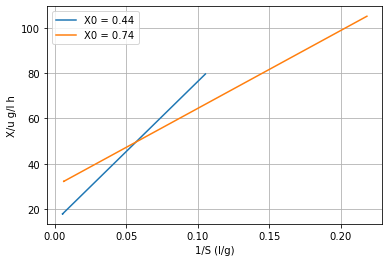

In [17]:
plt.plot(isdata, xoupred, label='X0 = 0.44')
plt.plot(isdata2, xoupred2, label='X0 = 0.74')
plt.xlabel('1/S (l/g)')
plt.ylabel('X/u g/l h')
plt.legend()
plt.grid()
plt.savefig('Inhibición', dpi=300)
plt.show

### Conclusión

La linearización del modelo permute verificar que existe un efecto de inhibición en el proceso.